## Example 1

Evaluate the integral of $f(x) = x^4 - 2x^3 + 1$ on the interval $[0, 2]$: first symbolically, and then numerically using the trapezoidal rule.

Note, we can evaluate the integral symbolically as long as the function has an analytical expression that SymPy (or Maple, Mathematica, Wolfram Alpha...) knows how to solve. Otherwise, numerical integration is required.

In [36]:
from sympy import *  # the symbolic math package

def f(x):
    return x**4 - 2*x**3 + 1

a = 0.0  # beginning of interval
b = 2.0  # end of interval
f(b)

In [37]:
# symbolic integration
xs = Symbol('xs', real=True)  # the variable of integration
integrate(f(xs), (xs, a, b))

### Trapezoidal Rule

In [54]:
# import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

def f(x):
    return x**4 - 2*x**3 + 1

def trapz(func:callable, start, end, N):
    """Trapezoidal integration function"""
    h = (end-start)/N
    s = (func(end) - func(start)) / 2

    for i in range(1, N):  # dont want i == 0
        s += func(a + i*h)

    return s*h

N = 1000

# h = (b-a)/N
# s = (f(b) + f(a)) / 2

# for i in range(1, N):  # dont want i == 0
#     s += f(a + i*h)


# print(s*h)
print(trapz(f, a, b, N))

2.3920026666656073


## Example 2

Let's have a look at Newman's gaussxw and gausswab code. Recall: 
* Use `gaussxw` for integration limits from $-1$ to $+1$,
* Use `gaussxwab` for integration limits from $a$ to $b$.
* Since the calculation of weights and points is expensive, use `gaussxw.py` if you are going to change the limits repeatedly (see textbook pages 167-168 for how).

Text(0, 0.5, 'Weight w')

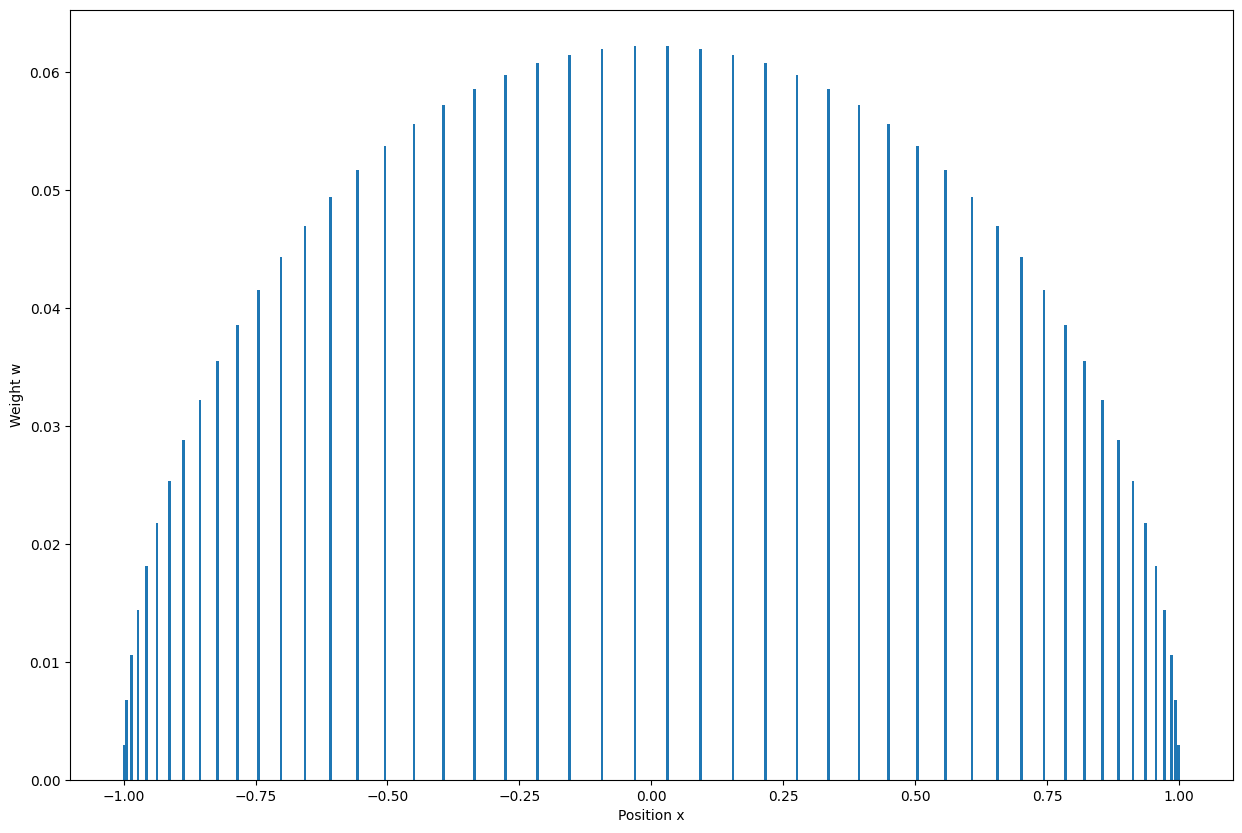

In [60]:
# %load gaussxw
from pylab import *
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15  # machine precision is 1e-16
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w


x_values, y_values = gaussxw(50)
plt.bar(x_values, y_values, width=0.005)
plt.xlabel("Position x")
plt.ylabel("Weight w")

### Explanation

These are the weights used for the weighted average while integrating. The edges have more sample points but lower weight.

Reproduce Newman's Figure 5.4 with the help of the above code.

![](gauss.PNG)

## Example 3

Compute $\displaystyle \int_{-1}^{1} \left[x^4 + \sin(x^2)\right]dx$ : first symbolically, and then using Gaussian quadrature.

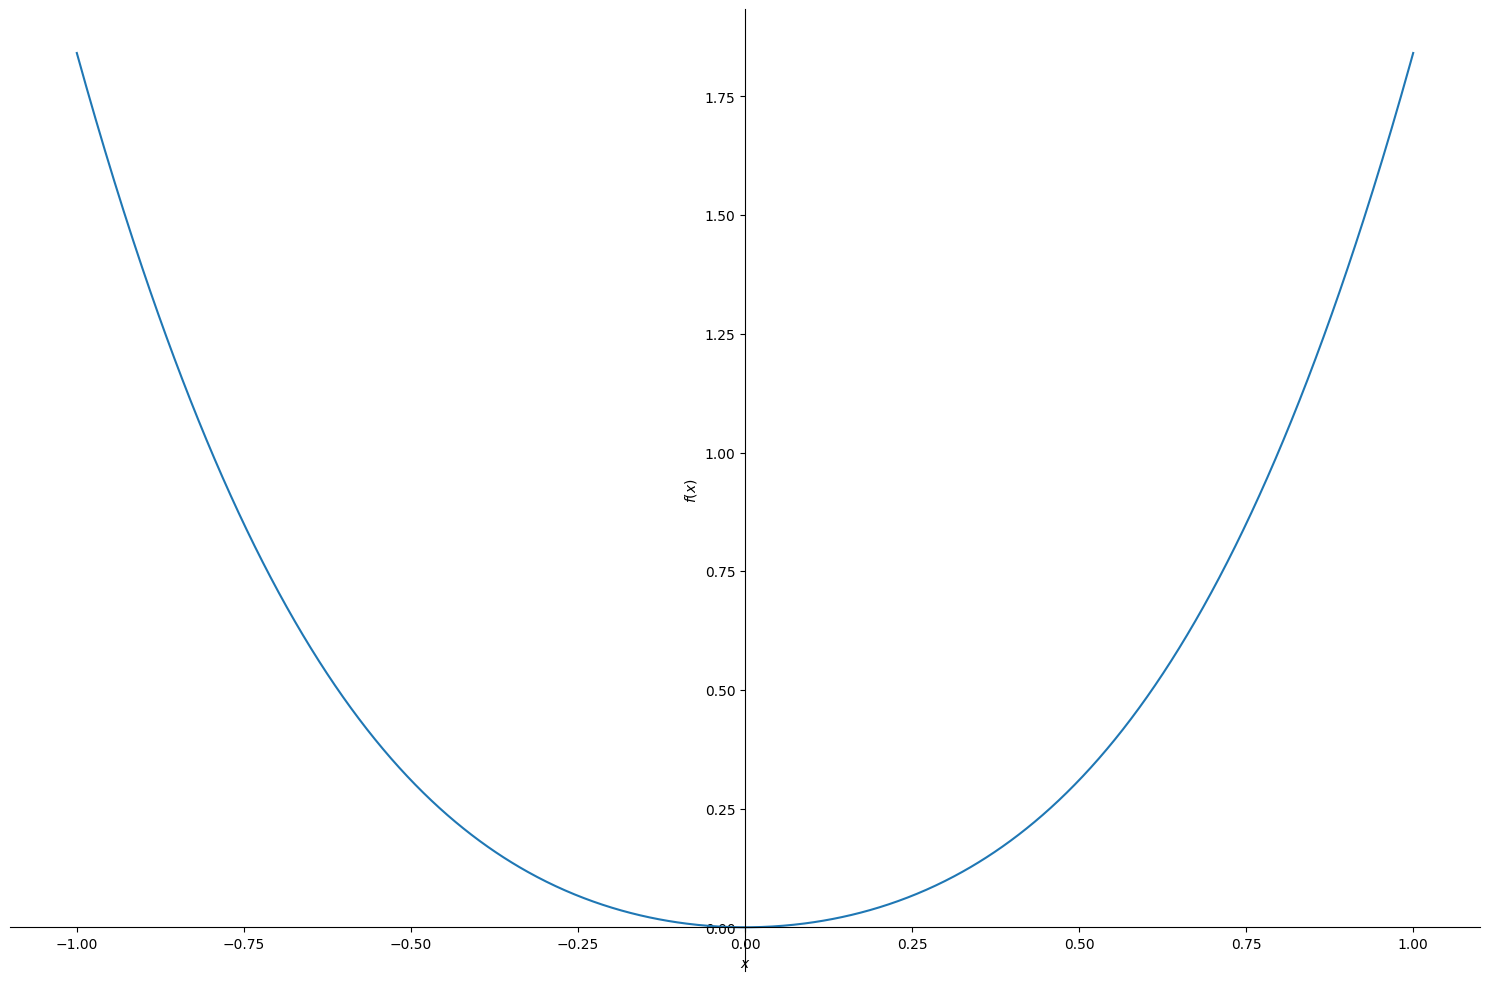

In [62]:
# first, plot the function using symbolic math package
from sympy import * 
init_printing()
x = symbols('x', real=True)
f = x**4 + sin(x**2)
plotting.plot(f, (x, -1, 1))

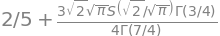

In [63]:
# integrate using symbolic math package
res=integrate(f, (x, -1, +1))
res

In [64]:
# Numerical evaluation
N(res)

In [66]:
type(x)

sympy.core.symbol.Symbol

In [70]:
# Perform the integration (from TB)
func = lambda x: x**4 + np.sin(x**2)
N = 2
s2 = 0.0
a = -1
b = 1

xp, wp = gaussxw(20)

for i in range(N):
    s2 += wp[i] * func(xp[i])

print(s2)

<class 'float'>


AttributeError: 'ImmutableDenseNDimArray' object has no attribute 'as_coefficient'